<a href="https://colab.research.google.com/github/Kyawhtin21501/CCC_project/blob/main/data_tra/sale_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files
uploaded = files.upload()  # 📤 ファイル選択画面が出る


Saving kaggle (1).json to kaggle (1) (1).json


In [30]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "Balaji Fast Food Sales.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rajatsurana979/fast-food-sales-report",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-931071278.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  


In [31]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [33]:
from dateutil import parser

df['date'] = df['date'].apply(lambda x: parser.parse(x))



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [35]:
from pydoc import replace
df = df.sort_values(by='date')



In [36]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
622,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Mr.,Midnight
571,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon
519,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Mrs.,Night
412,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Mrs.,Midnight
393,394,2022-04-03,Sandwich,Fastfood,60,1,60,Cash,Mrs.,Morning
604,605,2022-04-04,Cold coffee,Beverages,40,15,600,NaN,Mrs.,Afternoon
509,510,2022-04-04,Sandwich,Fastfood,60,14,840,Online,Mr.,Afternoon
333,334,2022-04-04,Cold coffee,Beverages,40,4,160,Cash,Mrs.,Evening
905,906,2022-04-04,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon


In [37]:
df.drop(columns=["order_id","item_name","item_type","item_price","quantity","transaction_type"],inplace=True)

In [38]:
df.head()
df.reset_index(drop=True,inplace=True)

In [39]:
df.head()
df.isnull().sum()


,0
date,0
transaction_amount,0
received_by,0
time_of_sale,0


In [40]:
df.drop(columns= ["received_by","time_of_sale"],axis=1,inplace=True)


In [41]:
df.head()

,date,transaction_amount
0,2022-04-01,420
1,2022-04-02,600
2,2022-04-02,900
3,2022-04-03,220
4,2022-04-03,200


In [42]:
grouped_df = df.groupby('date')['transaction_amount'].mean()
grouped_df = pd.DataFrame(grouped_df)




print(grouped_df.head())


            transaction_amount
date                          
2022-04-01               420.0
2022-04-02               750.0
2022-04-03               160.0
2022-04-04               625.0
2022-04-05               100.0


In [43]:
display(grouped_df)

,transaction_amount
date,
2022-04-01,420.000000
2022-04-02,750.000000
2022-04-03,160.000000
2022-04-04,625.000000
2022-04-05,100.000000
...,...
2023-03-25,280.000000
2023-03-26,93.333333
2023-03-27,260.000000


In [44]:
df = grouped_df

In [45]:
df['transaction_amount'] = df["transaction_amount"] * 1.5

In [46]:
df.reset_index(inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                348 non-null    datetime64[ns]
 1   transaction_amount  348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


<Axes: xlabel='date', ylabel='transaction_amount'>

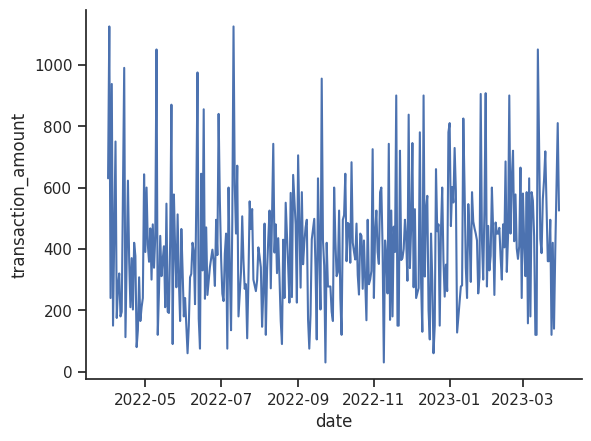

In [47]:
sns.lineplot(data=df,x="date",y="transaction_amount")

In [48]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


df['weekday'] = df['date'].dt.weekday


df['weekday_name'] = df['date'].dt.day_name()

In [49]:
df.head(10)

,date,transaction_amount,year,month,day,weekday,weekday_name
0,2022-04-01,630.0,2022,4,1,4,Friday
1,2022-04-02,1125.0,2022,4,2,5,Saturday
2,2022-04-03,240.0,2022,4,3,6,Sunday
3,2022-04-04,937.5,2022,4,4,0,Monday
4,2022-04-05,150.0,2022,4,5,1,Tuesday
5,2022-04-07,750.0,2022,4,7,3,Thursday
6,2022-04-08,175.0,2022,4,8,4,Friday
7,2022-04-09,277.5,2022,4,9,5,Saturday
8,2022-04-10,320.0,2022,4,10,6,Sunday
9,2022-04-11,180.0,2022,4,11,0,Monday


In [50]:
weekday_day_grouped = df.groupby('weekday_name')['transaction_amount'].mean()
weekday_day_grouped = pd.DataFrame(weekday_day_grouped)
weekday_day_grouped.reset_index(inplace=True)
weekday_day_grouped


,weekday_name,transaction_amount
0,Friday,382.710357
1,Monday,440.873724
2,Saturday,393.088942
3,Sunday,416.287465
4,Thursday,438.990160
5,Tuesday,431.761968
6,Wednesday,378.428929


<Axes: xlabel='weekday_name', ylabel='transaction_amount'>

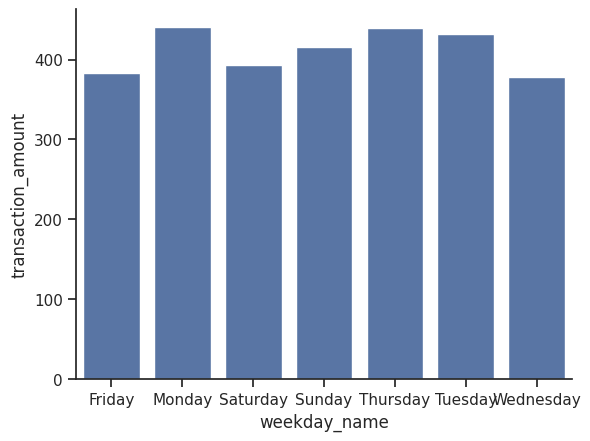

In [51]:


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=weekday_day_grouped['weekday_name'], y=weekday_day_grouped['transaction_amount'])

In [52]:
month_group_df = df.groupby('month')['transaction_amount'].mean()
month_group_df = pd.DataFrame(month_group_df)
month_group_df.reset_index(inplace=True)
month_group_df

,month,transaction_amount
0,1,484.706897
1,2,469.493622
2,3,460.417488
3,4,385.446429
4,5,396.796371
5,6,388.519180
6,7,385.912500
7,8,366.521552
8,9,371.470238
9,10,402.510417


<Axes: xlabel='month', ylabel='transaction_amount'>

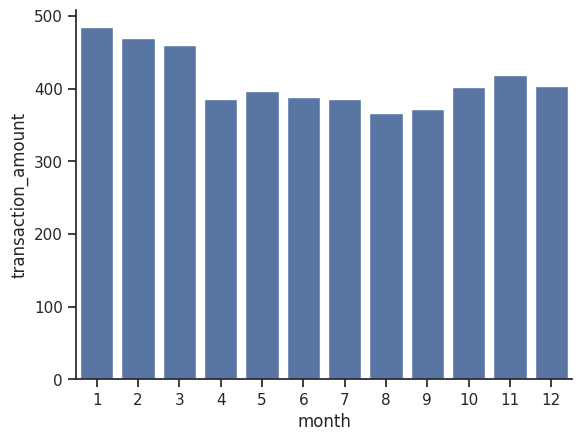

In [53]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=month_group_df['month'], y=month_group_df['transaction_amount'])

In [54]:
df.head()

,date,transaction_amount,year,month,day,weekday,weekday_name
0,2022-04-01,630.0,2022,4,1,4,Friday
1,2022-04-02,1125.0,2022,4,2,5,Saturday
2,2022-04-03,240.0,2022,4,3,6,Sunday
3,2022-04-04,937.5,2022,4,4,0,Monday
4,2022-04-05,150.0,2022,4,5,1,Tuesday


from matplotlib import pyplot as plt
_df_0['transaction_amount'].plot(kind='hist', bins=20, title='transaction_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['weekday'].plot(kind='hist', bins=20, title='weekday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('weekday_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='transaction_amount', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='day', y='weekday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['transaction_amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weekday_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='weekday_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('transaction_amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['weekday']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weekday_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='weekday_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('weekday')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weekday_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='weekday_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['transaction_amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weekday_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='weekday_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('transaction_amount')

from matplotlib import pyplot as plt
_df_10['transaction_amount'].plot(kind='line', figsize=(8, 4), title='transaction_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['weekday'].plot(kind='line', figsize=(8, 4), title='weekday')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['weekday_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='transaction_amount', y='weekday_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['weekday_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='day', y='weekday_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['weekday_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='weekday', y='weekday_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [56]:
df.isnull().sum()

,0
date,0
transaction_amount,0
year,0
month,0
day,0
weekday,0
weekday_name,0


In [57]:
print(df['date'].min())

2022-04-01 00:00:00


In [59]:
print(df['date'].max())

2023-03-30 00:00:00


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                348 non-null    datetime64[ns]
 1   transaction_amount  348 non-null    float64       
 2   year                348 non-null    int32         
 3   month               348 non-null    int32         
 4   day                 348 non-null    int32         
 5   weekday             348 non-null    int32         
 6   weekday_name        348 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(4), object(1)
memory usage: 13.7+ KB
